<a href="https://www.kaggle.com/code/yasinsoylu123/heart-attack-machine-learning-prediction?scriptVersionId=116534870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
df.corr()["output"]

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

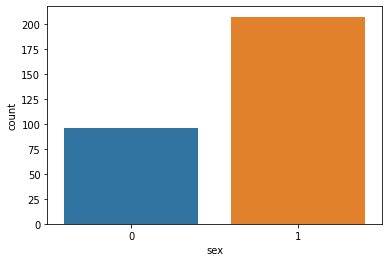

In [9]:
sns.countplot(data=df, x="sex")
plt.show()

In [10]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

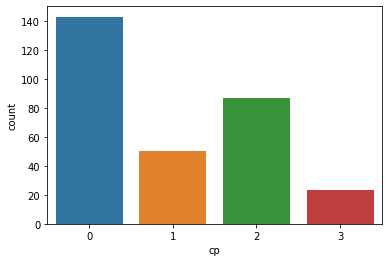

In [11]:
sns.countplot(data=df, x="cp")
plt.show()

In [12]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:ylabel='fbs'>

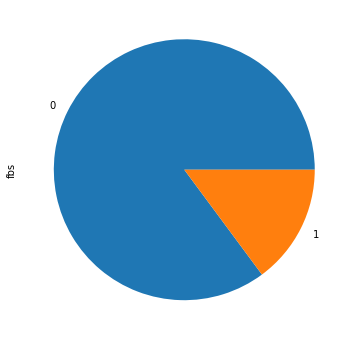

In [13]:
df["fbs"].value_counts().plot(kind="pie", figsize= (8,6))

In [14]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

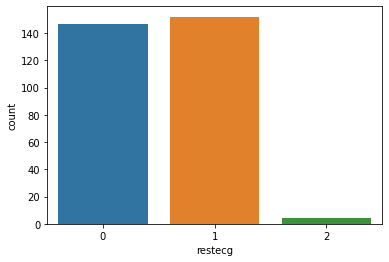

In [15]:
sns.countplot(data=df, x="restecg")
plt.show()

In [16]:
df["exng"].value_counts()

0    204
1     99
Name: exng, dtype: int64

<AxesSubplot:>

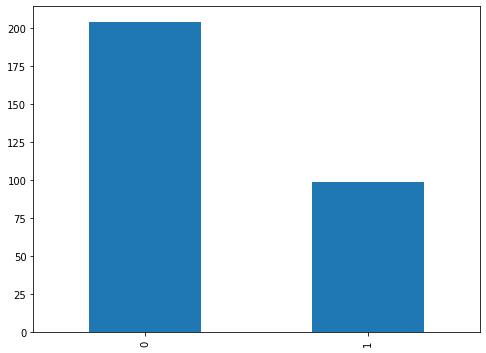

In [17]:
df["exng"].value_counts().plot(kind="bar", figsize= (8,6))

In [18]:
df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

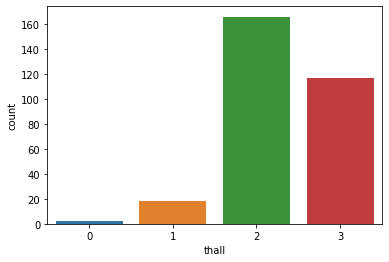

In [19]:
sns.countplot(data=df, x="thall")
plt.show()


<Figure size 720x720 with 0 Axes>

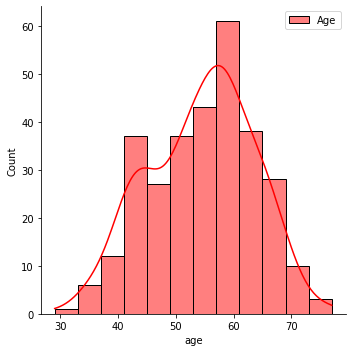

In [20]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="red", label="Age", kde= True)
plt.legend()

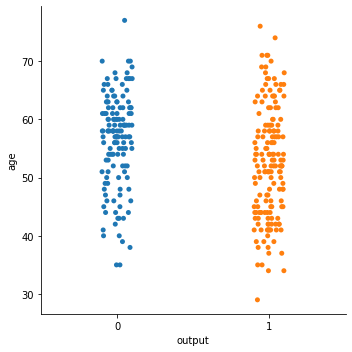

In [21]:
sns.catplot(x = "output", y = "age", data = df);

<Figure size 1440x1440 with 0 Axes>

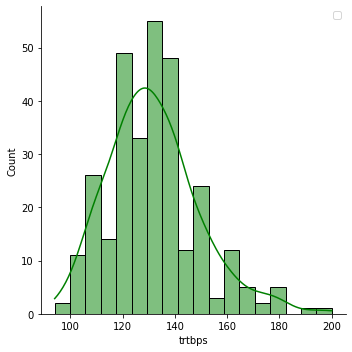

In [22]:
plt.figure(figsize=(20,20))
sns.displot(df.trtbps , color="green",  kde= True)
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


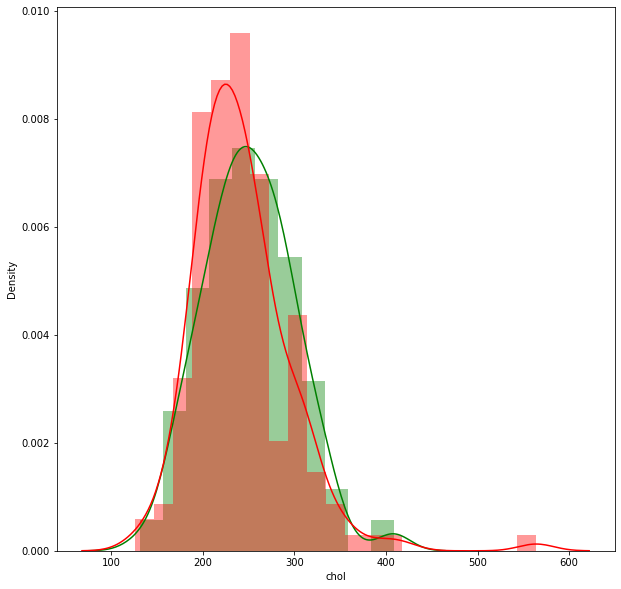

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


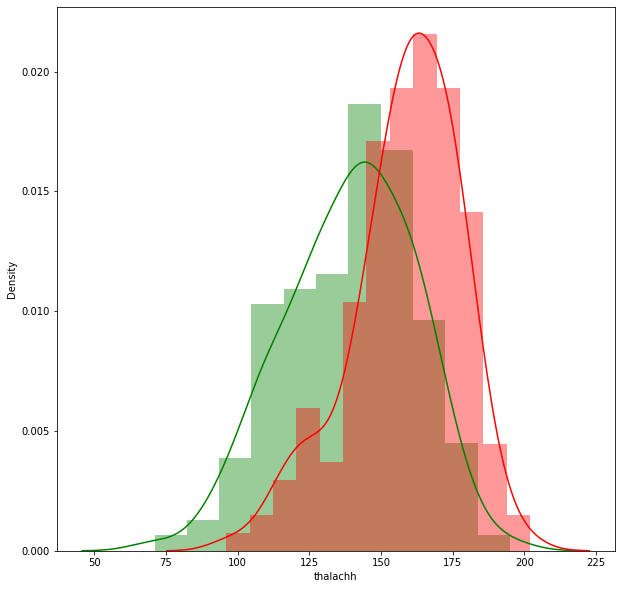

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["thalachh"], color='red',kde=True)
plt.show()

<Figure size 2160x2160 with 0 Axes>

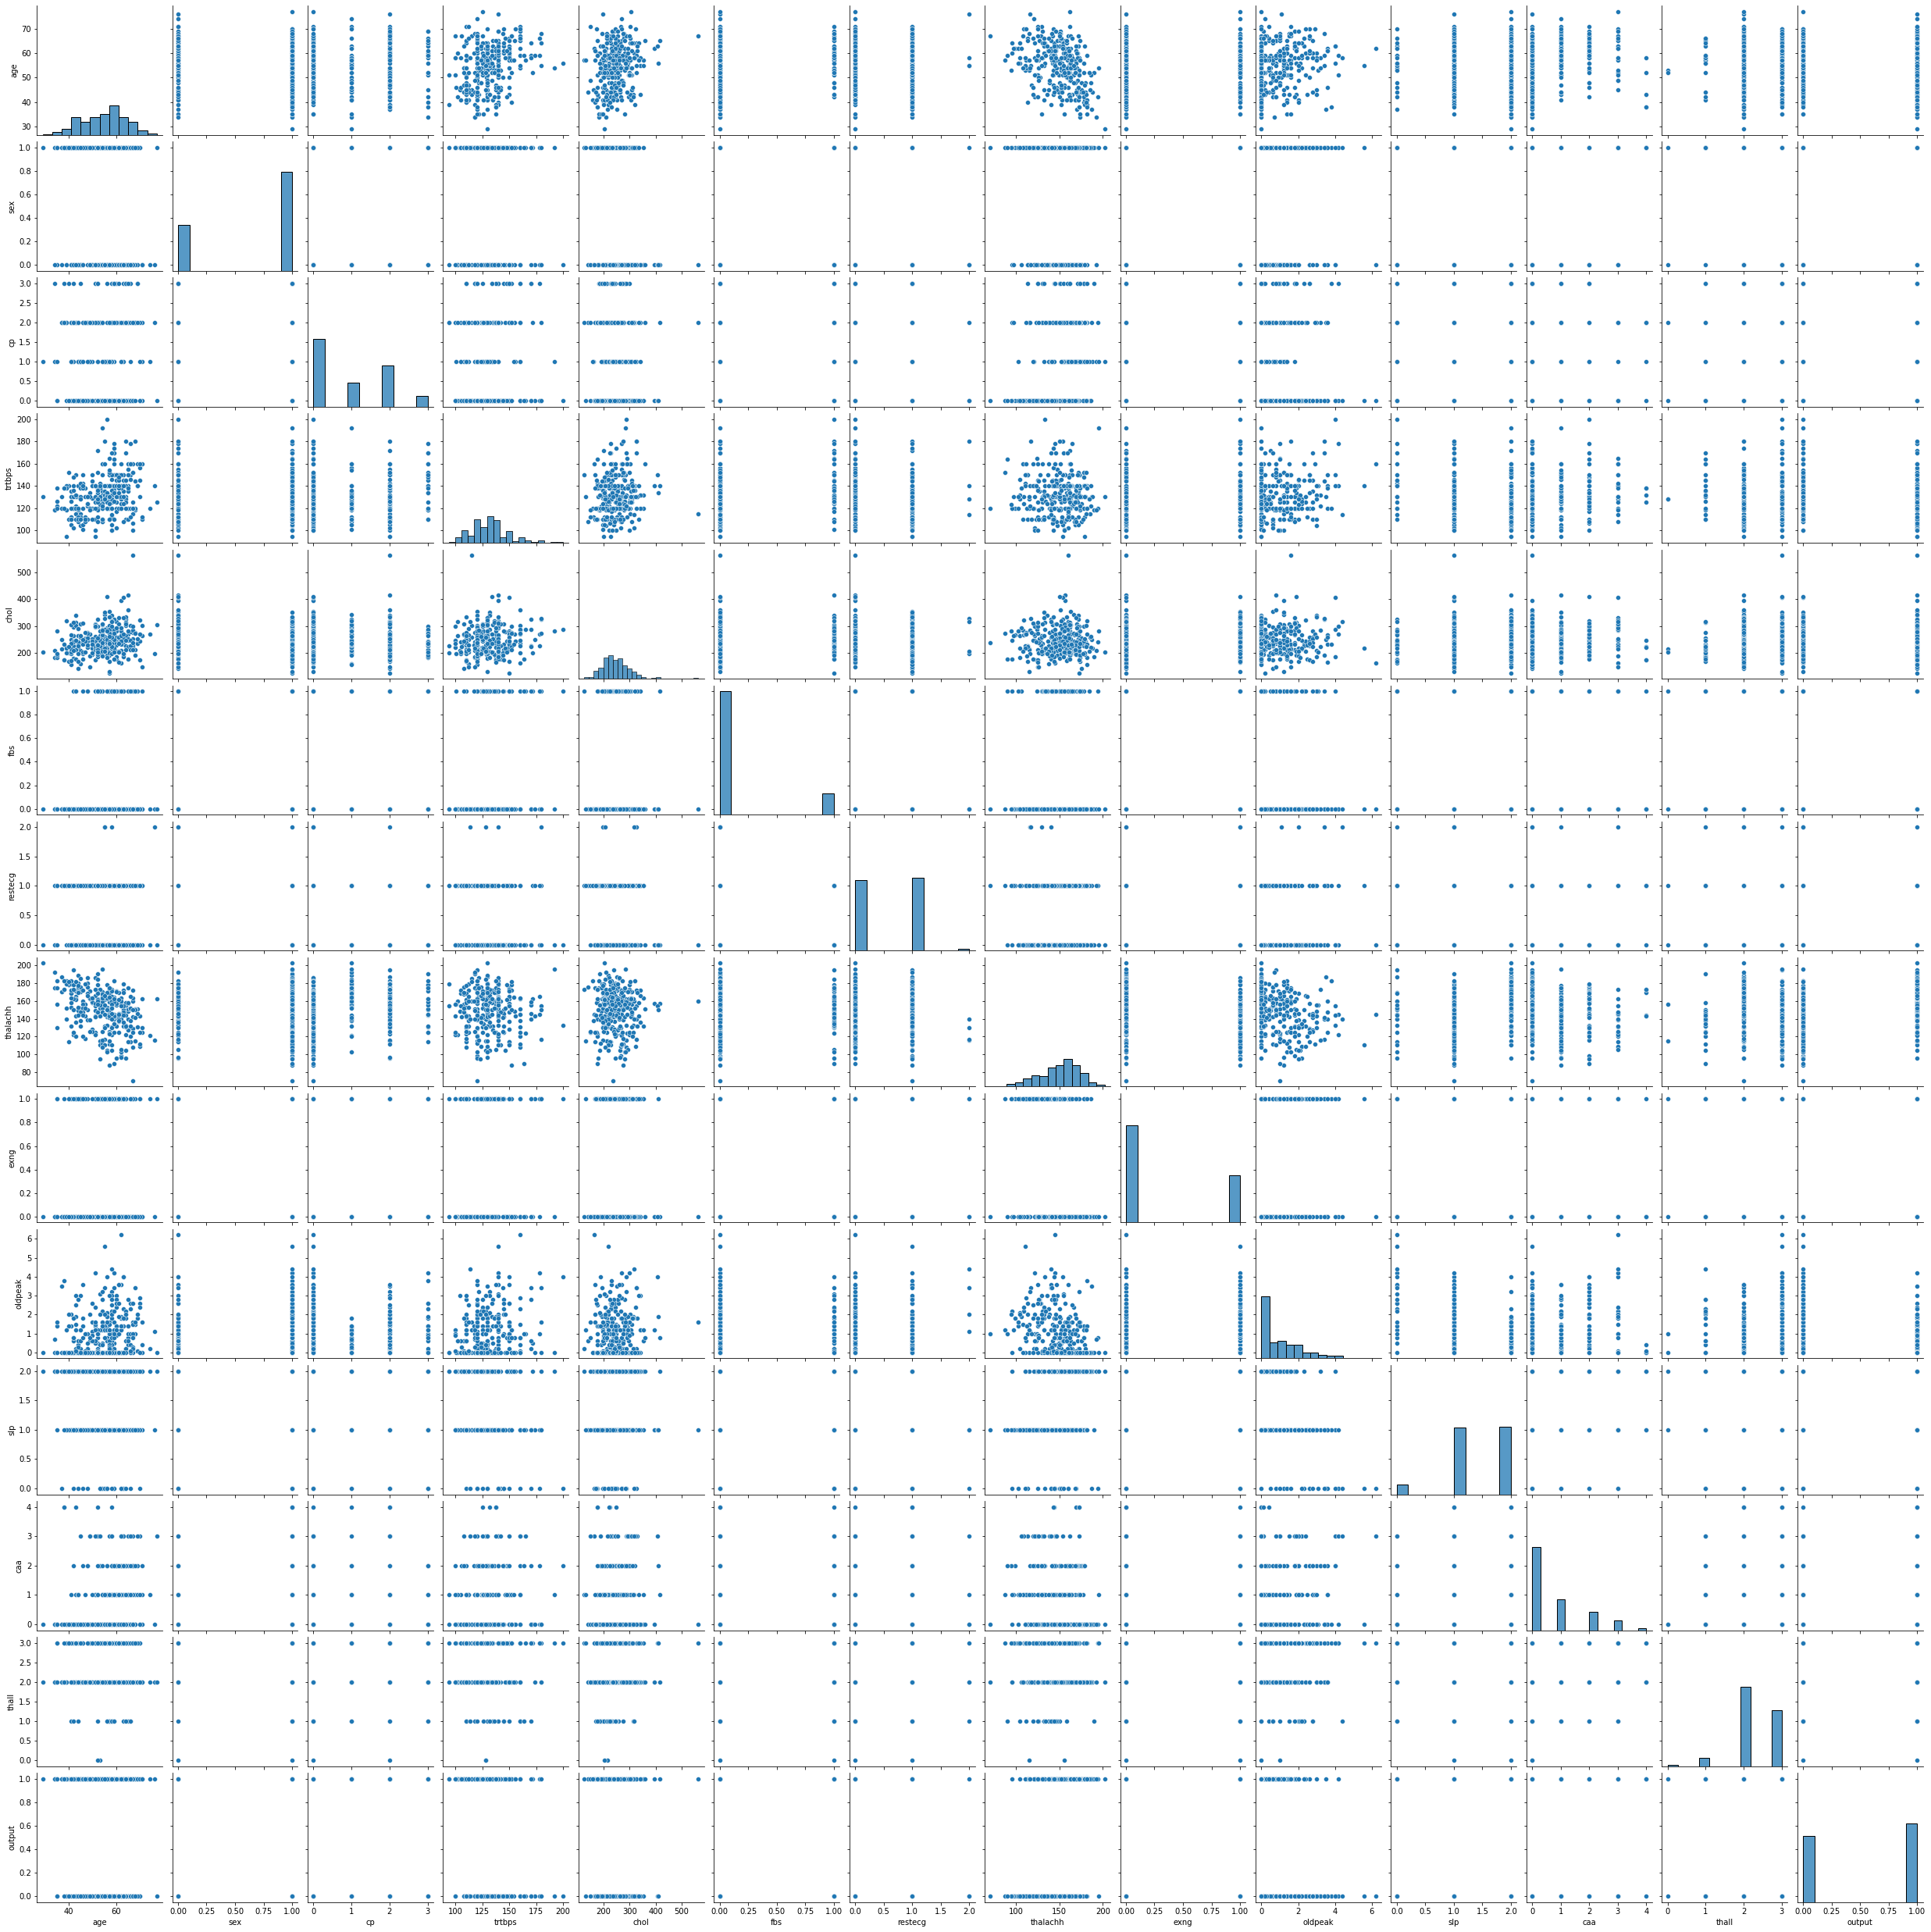

In [25]:
plt.figure(figsize=(30,30))
sns.pairplot(df)
plt.show()

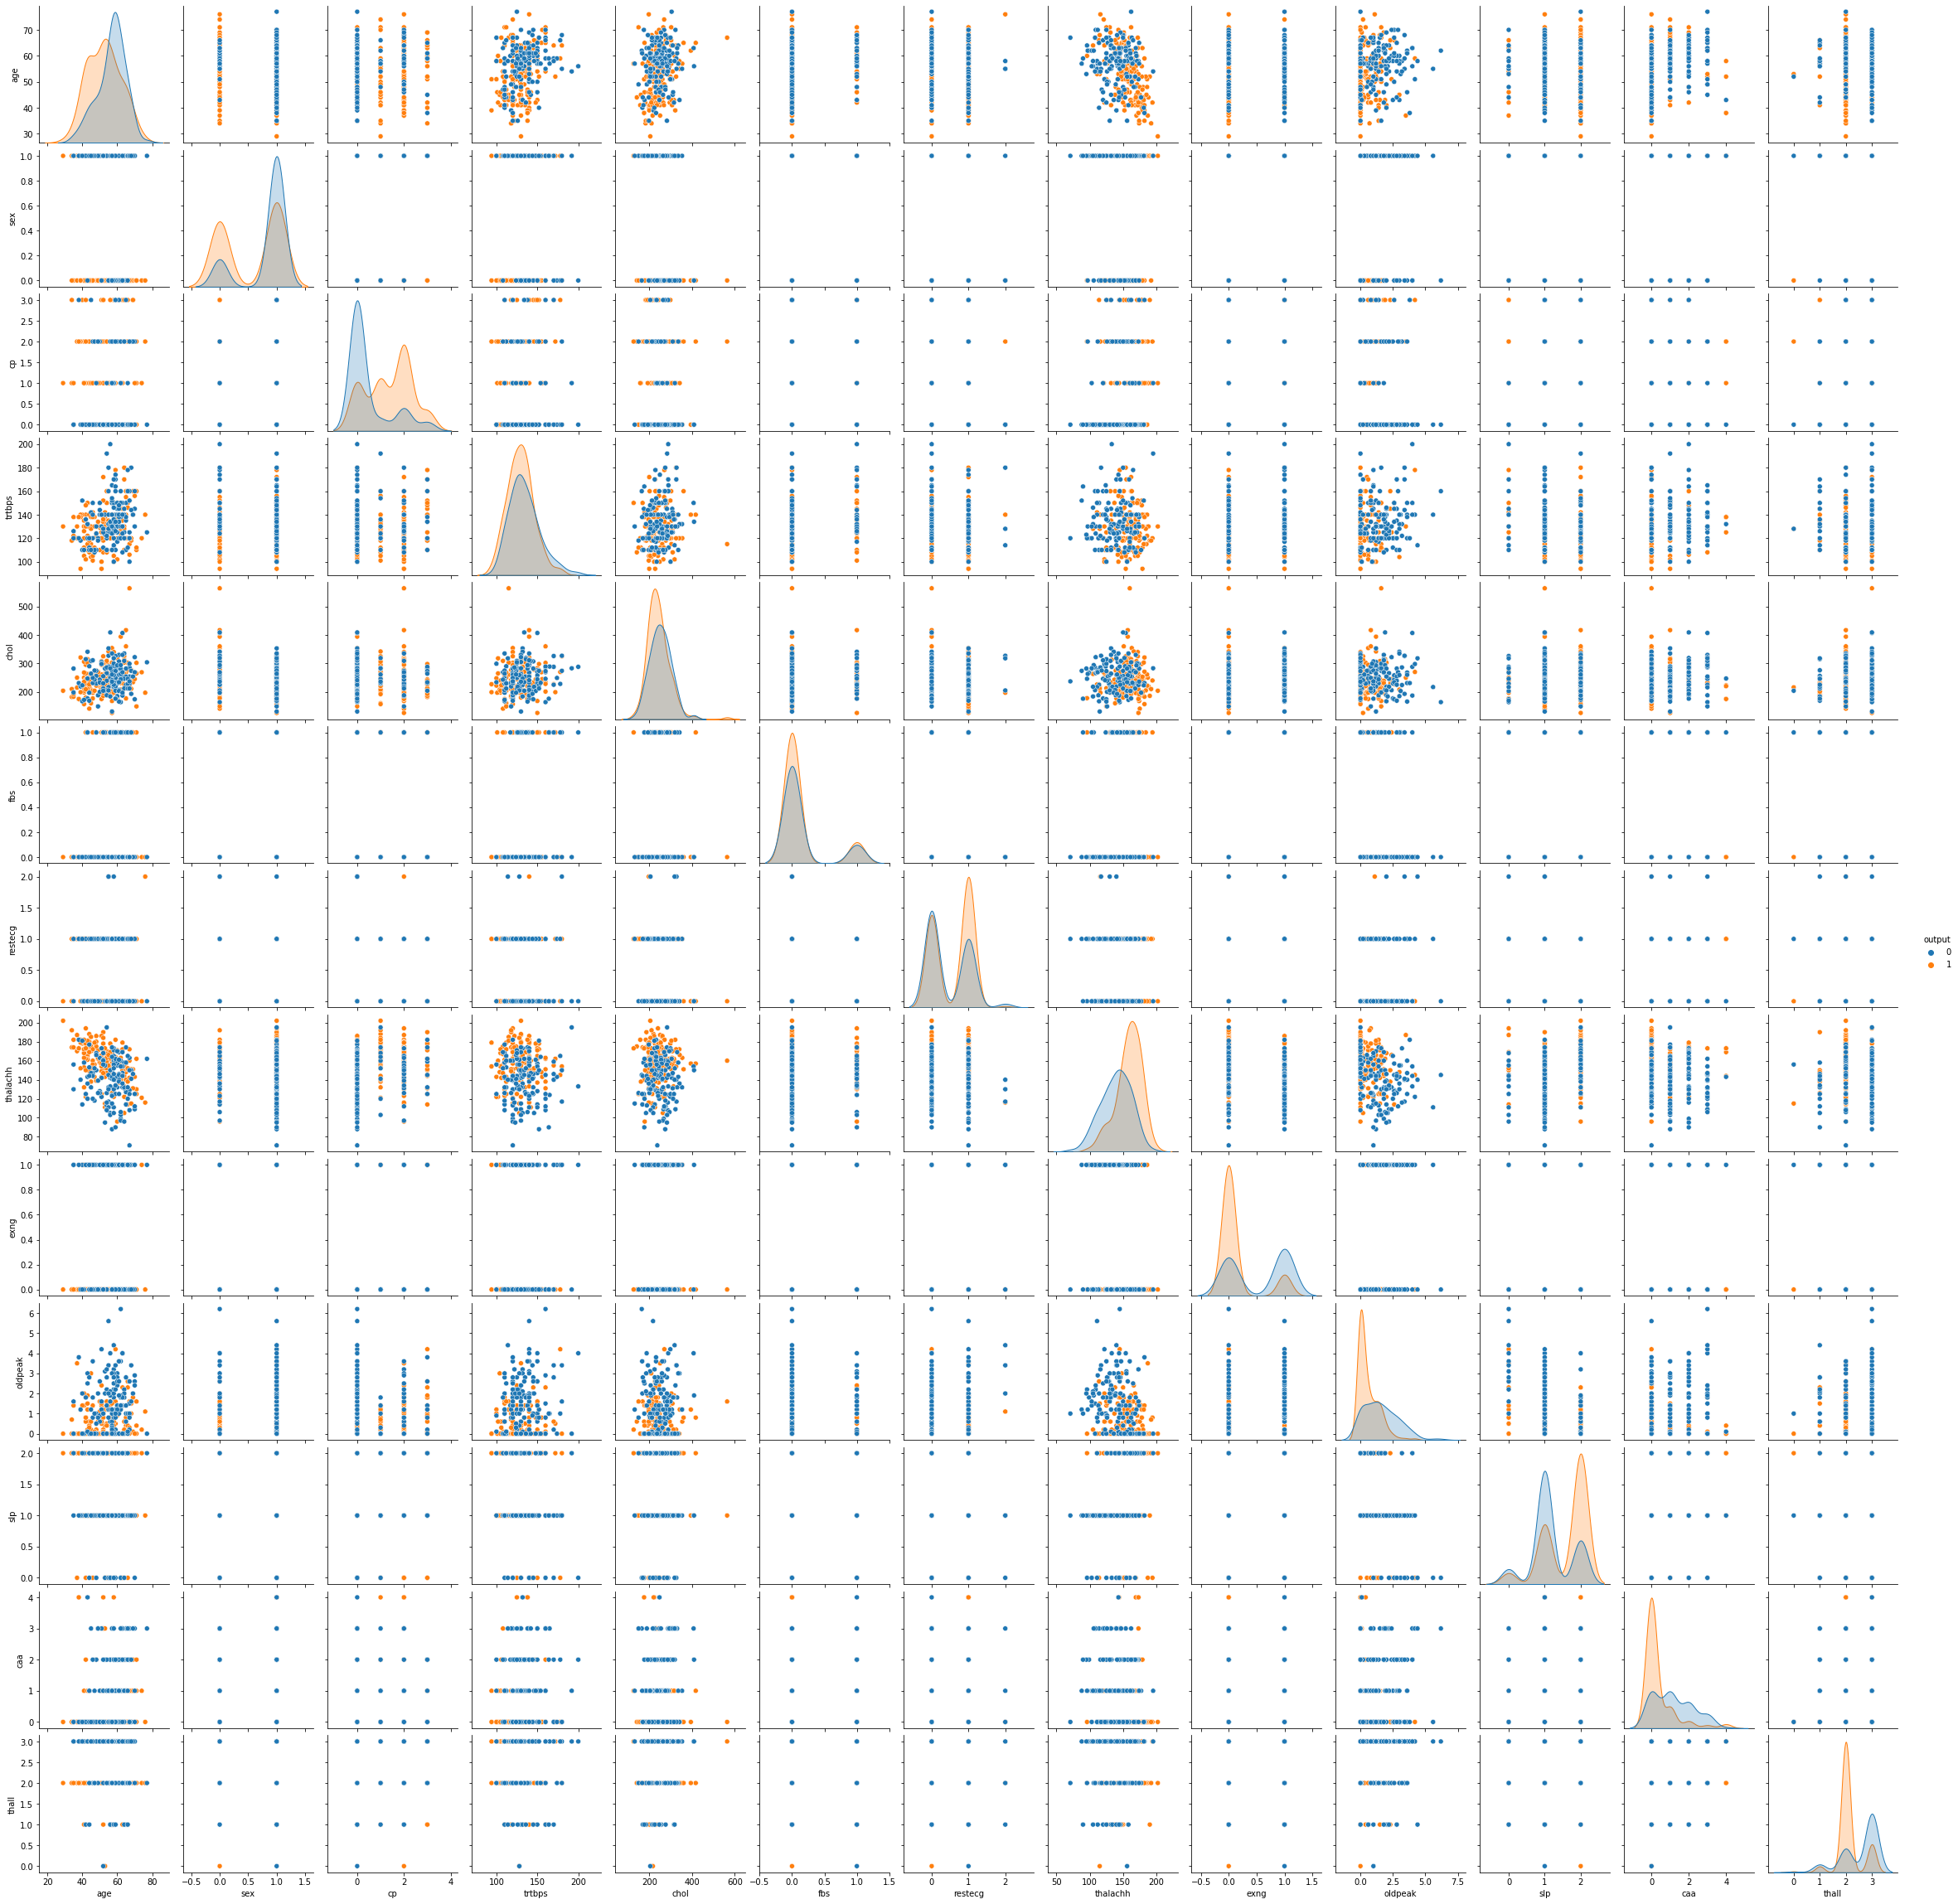

In [26]:
sns.pairplot(df, hue = "output");

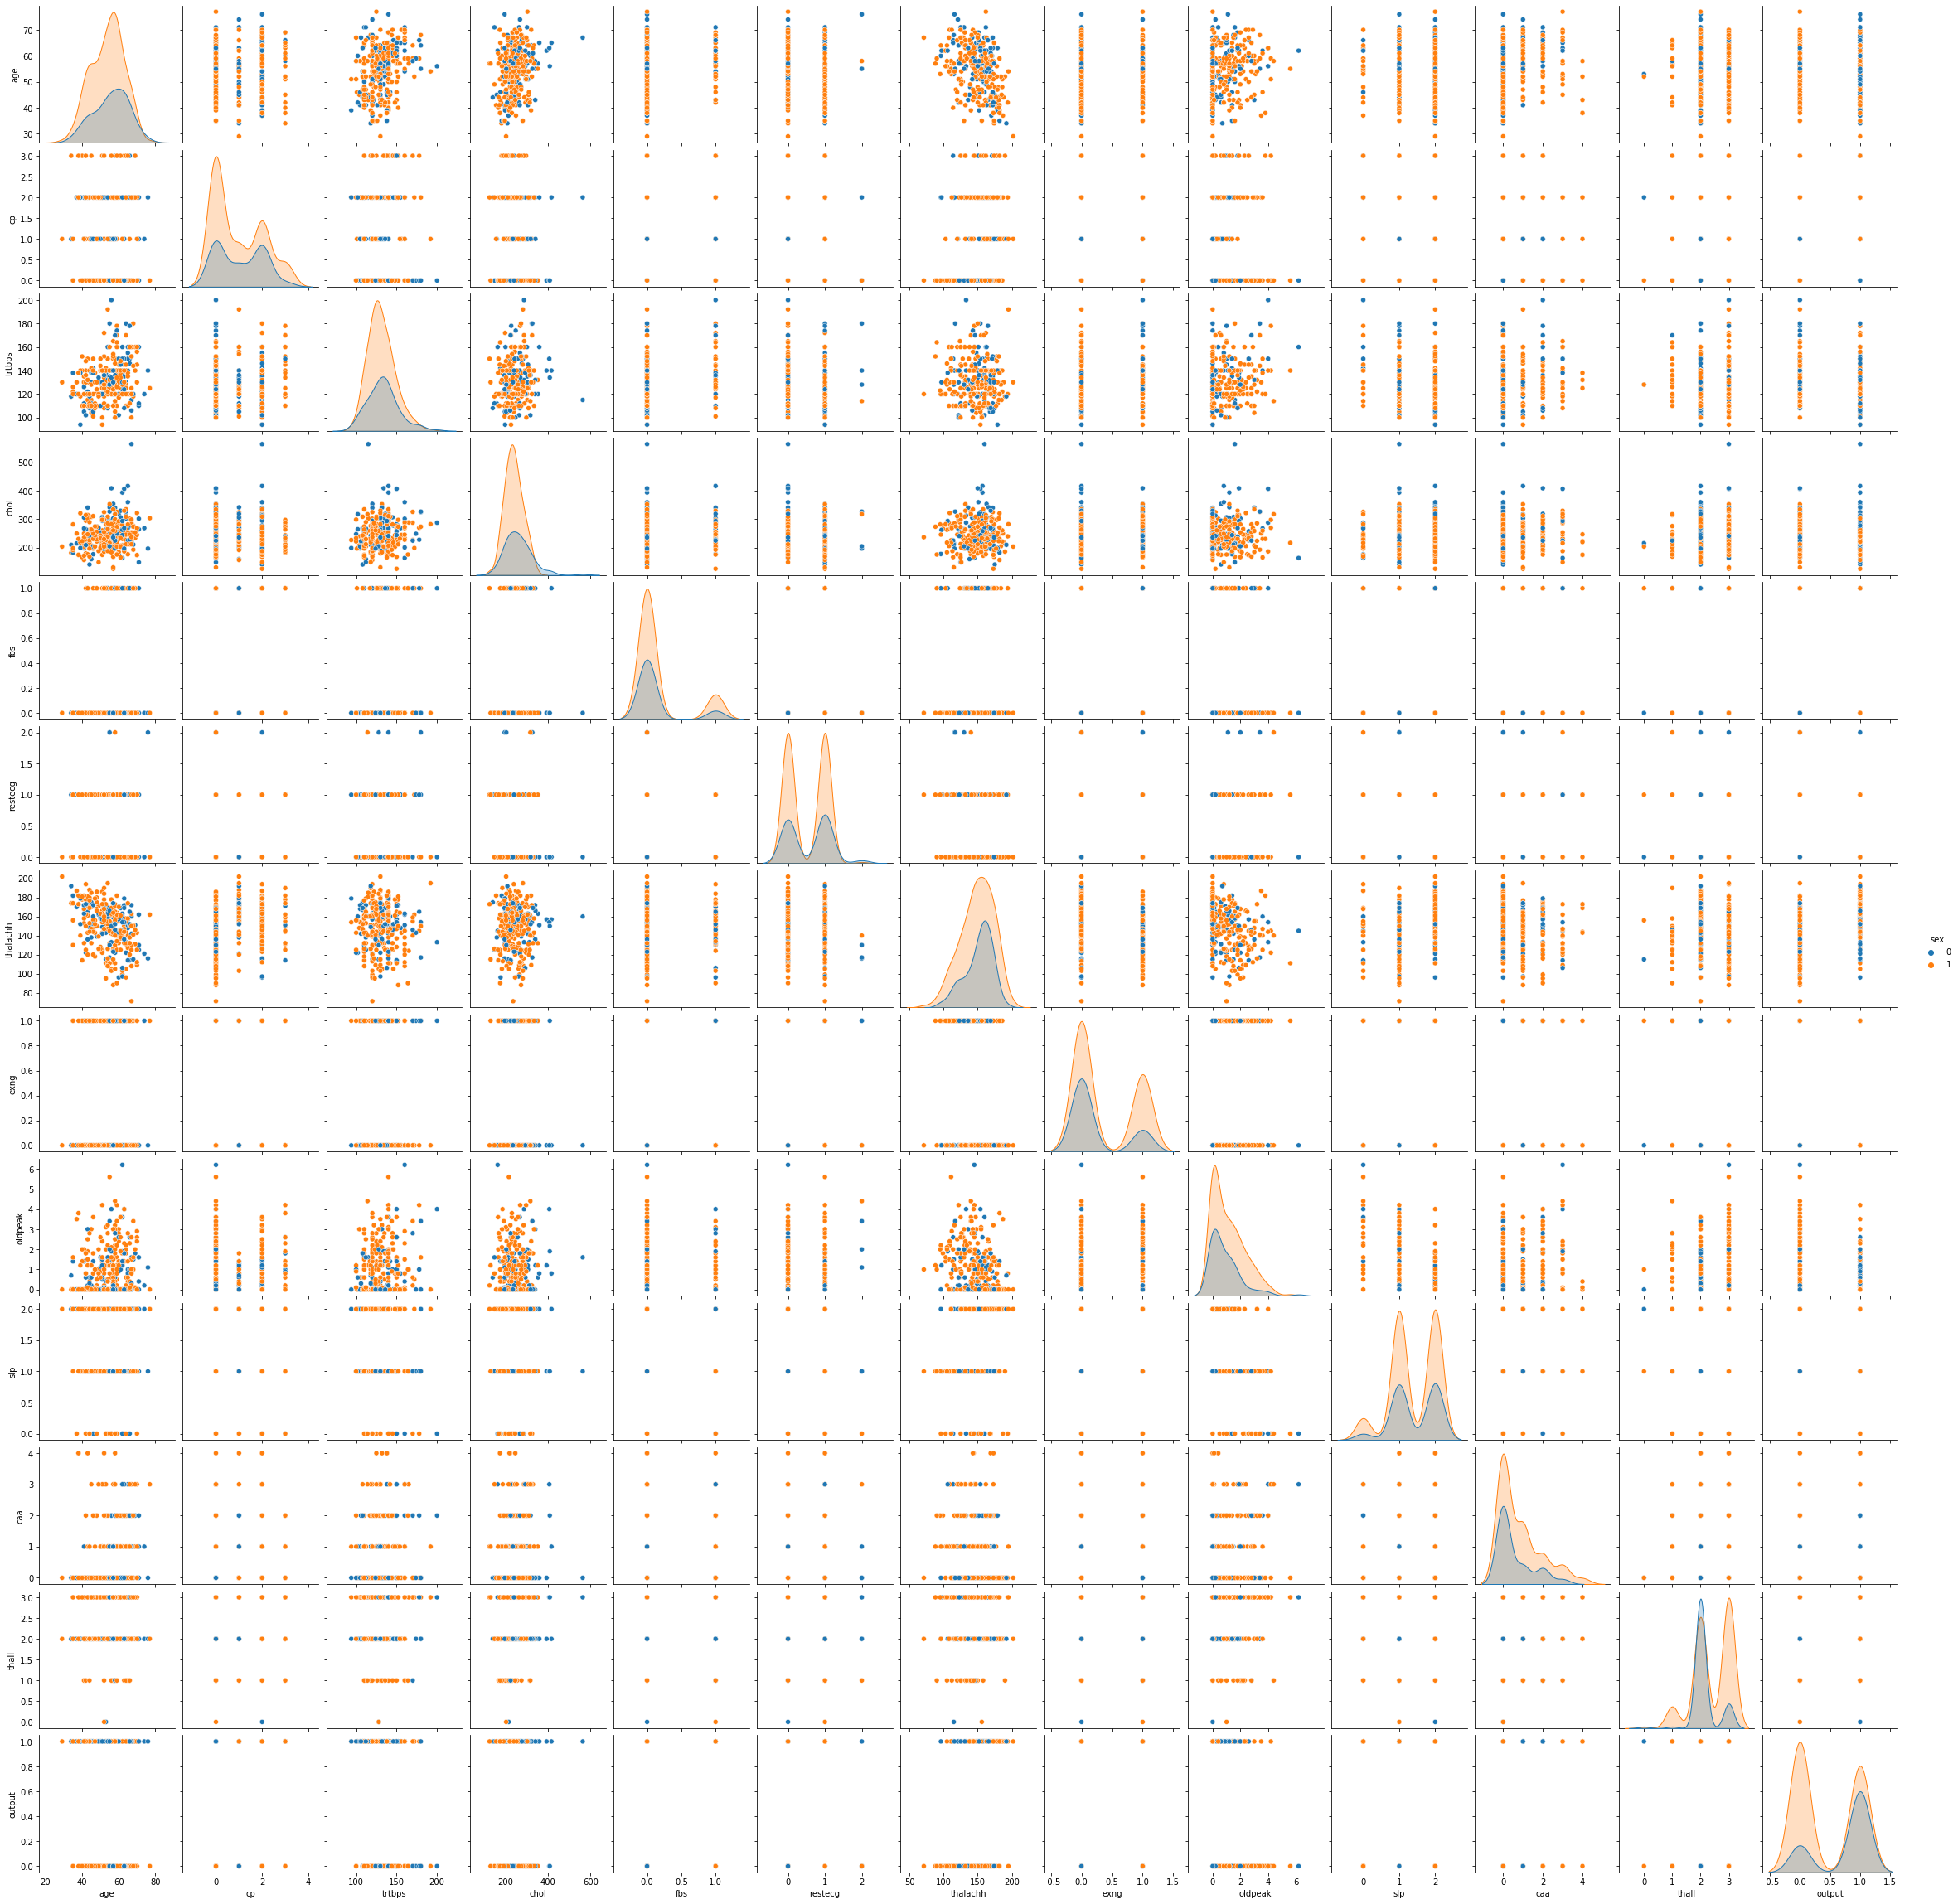

In [27]:
sns.pairplot(df, hue = "sex");

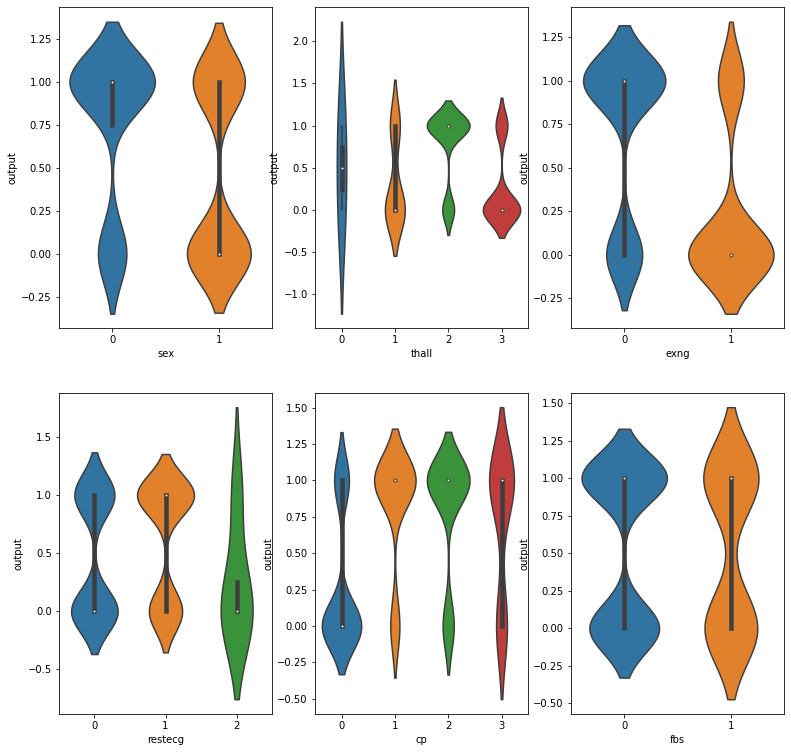

In [28]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = "sex", y = "output", data = df)
plt.subplot(2,3,2)
sns.violinplot(x = "thall", y = "output", data = df)
plt.subplot(2,3,3)
sns.violinplot(x = "exng", y = "output", data = df)
plt.subplot(2,3,4)
sns.violinplot(x = "restecg", y = "output", data = df)
plt.subplot(2,3,5)
sns.violinplot(x = "cp", y = "output", data = df)
plt.subplot(2,3,6)
sns.violinplot(x = "fbs", y = "output", data = df)

plt.show()

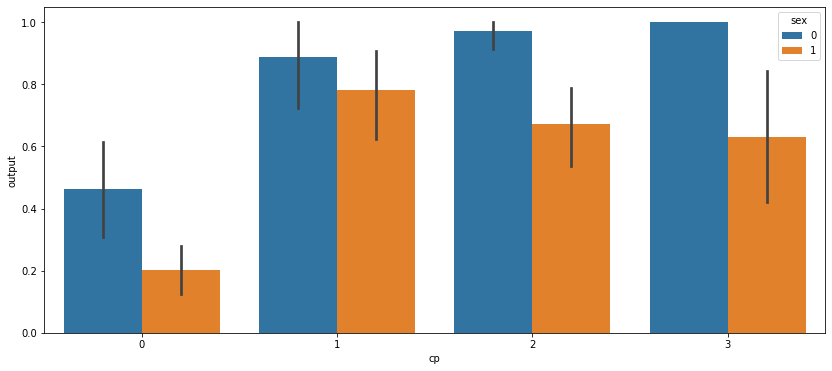

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x = "cp", y = "output", hue = "sex", data = df);

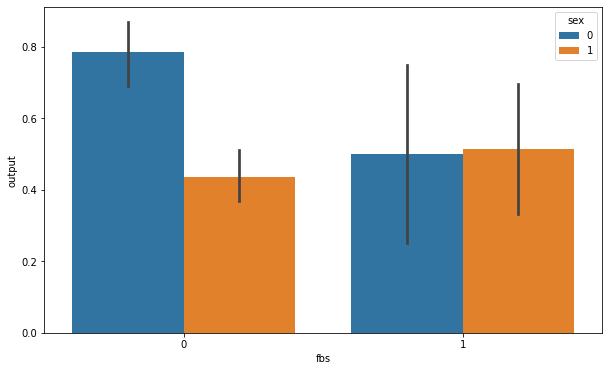

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x = "fbs", y = "output", hue = "sex", data = df);

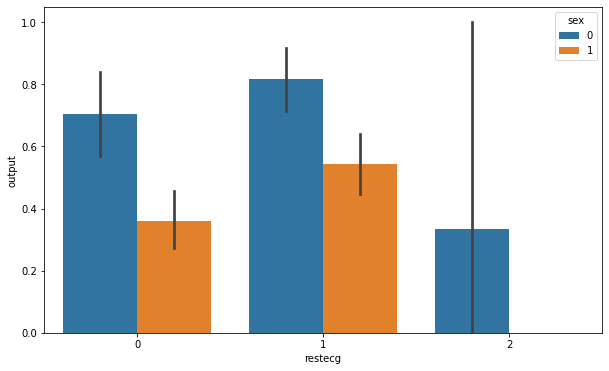

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x = "restecg", y = "output", hue = "sex", data = df);

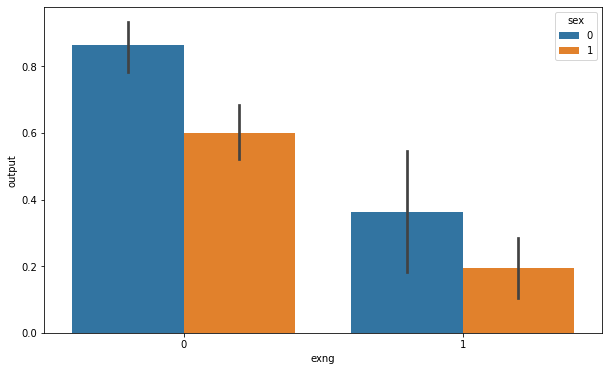

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x = "exng", y = "output", hue = "sex", data = df);

In [33]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


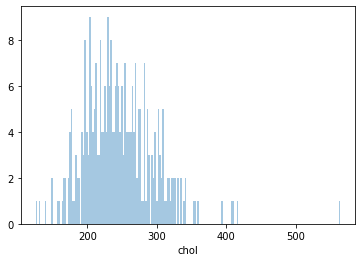

In [34]:
sns.distplot(df.chol, kde = False , bins=200);

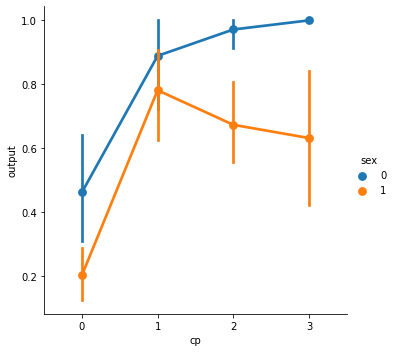

In [35]:
sns.catplot(x = "cp", y = "output", hue = "sex", kind = "point", data = df);

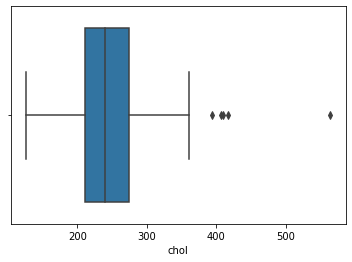

In [36]:
sns.boxplot(x = df["chol"]);

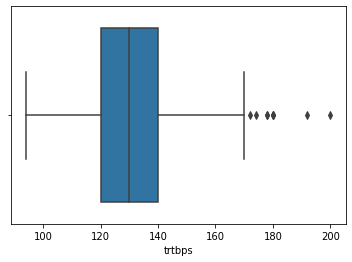

In [37]:
sns.boxplot(x = df["trtbps"]);

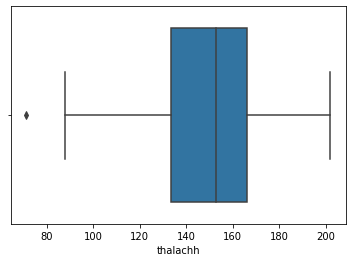

In [38]:
sns.boxplot(x = df["thalachh"]);

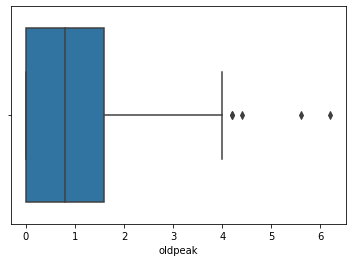

In [39]:
sns.boxplot(x = df["oldpeak"]);

(10.0, 0.0)

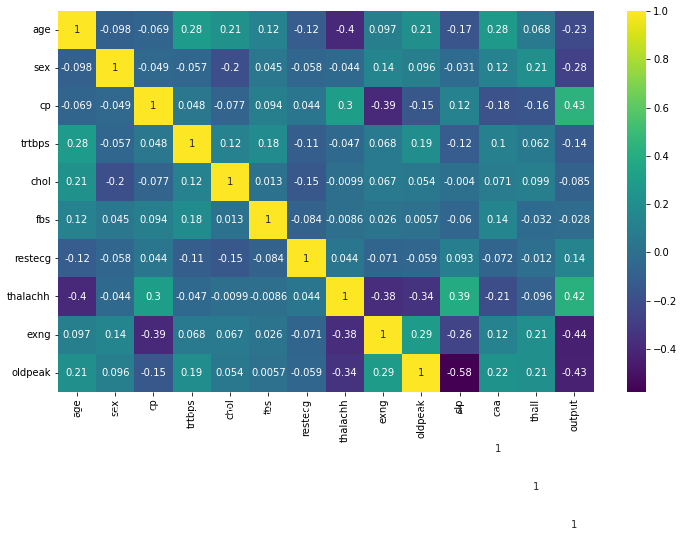

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.ylim(10, 0)


# data preprocessing


In [41]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
x,y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)


In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


# DATA SCALE

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [46]:
gnb.fit(x_train, y_train)
predicted=gnb.predict(x_test)
conf = confusion_matrix(y_test, predicted)

In [47]:
print (conf)

[[26  3]
 [ 5 27]]


In [48]:
accuracy_score(y_test, predicted)

0.8688524590163934

In [49]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# LogisticRegression

In [50]:
loj_model = LogisticRegression()
loj_model.fit(x_train, y_train)
predicted=loj_model.predict(x_test)
conf = confusion_matrix(y_test, predicted)

In [51]:
print (conf)

[[25  4]
 [ 5 27]]


In [52]:
accuracy_score(y_test, predicted)

0.8524590163934426

In [53]:
loj_model.coef_

array([[-0.08549335, -0.78306451,  0.81800359, -0.27349329, -0.17508509,
         0.09046532,  0.28414084,  0.39518149, -0.51749088, -0.68097827,
         0.43552474, -0.79012711, -0.56558958]])

In [54]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [55]:
loj_model.predict(x_test)[0:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [56]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
loj_model.predict_proba(x_train)[0:10]

array([[0.08428095, 0.91571905],
       [0.95144763, 0.04855237],
       [0.58366717, 0.41633283],
       [0.1570581 , 0.8429419 ],
       [0.93200402, 0.06799598],
       [0.17540338, 0.82459662],
       [0.17978454, 0.82021546],
       [0.2036736 , 0.7963264 ],
       [0.0792245 , 0.9207755 ],
       [0.01949121, 0.98050879]])

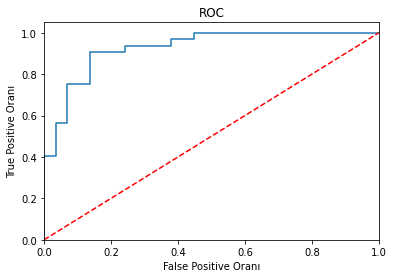

In [58]:
logit_roc_auc = roc_auc_score(y_test,loj_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [59]:
cross_val_score(loj_model, x_test, y_test, cv = 10).mean()

0.8523809523809524

# KNN

In [60]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
knn_model

KNeighborsClassifier()

In [61]:
y_pred = knn_model.predict(x_test)

In [62]:
accuracy_score(y_test, y_pred)

0.9016393442622951

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [64]:
conf = confusion_matrix(y_test, y_pred)


<AxesSubplot:>

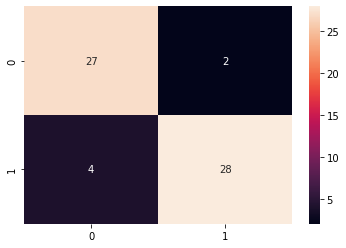

In [65]:
sns.heatmap(conf, annot=True)

# Model Tuning

In [66]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [67]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.8228333333333333
En iyi parametreler: {'n_neighbors': 16}


In [69]:
knn = KNeighborsClassifier(16)
knn_tuned = knn.fit(x_train, y_train)

In [70]:
knn_tuned.score(x_test, y_test)

0.8852459016393442

In [71]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8852459016393442

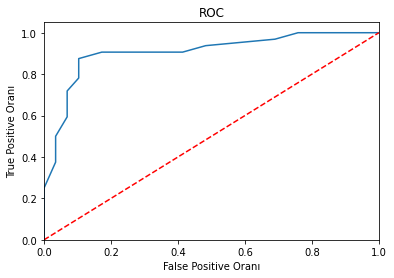

In [72]:
knn_tuned_roc_auc = roc_auc_score(y_test,knn_tuned.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % knn_tuned_roc_auc)
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

# Random Forests

In [73]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [74]:
rf_model

RandomForestClassifier()

In [75]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

# Model Tuning

In [76]:
rf_params = {"max_depth": [2,4,6,8,10],
            "max_features": [2,4,6,8,10],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,4,6,8,10]}

In [77]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 1) 

In [78]:
rf_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1875 out of 1875 | elapsed: 10.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=1)

In [79]:
print("best params " + str(rf_cv_model.best_params_))

best params {'max_depth': 2, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 500}


In [80]:
rf_tuned = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 4,
                                  n_estimators = 500)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, min_samples_split=4,
                       n_estimators=500)

In [81]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8852459016393442

In [82]:
conf = confusion_matrix(y_test, y_pred)


<AxesSubplot:>

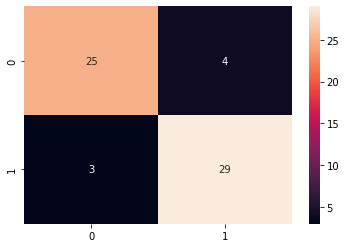

In [83]:
sns.heatmap(conf, annot=True)

# SVM

In [84]:
svm_model = SVC(kernel = "linear").fit(x_train, y_train)

svm_model

SVC(kernel='linear')

In [85]:
y_pred = svm_model.predict(x_test)

In [86]:
accuracy_score(y_test, y_pred)

0.8688524590163934

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Model Tuning

In [88]:
svc = SVC(kernel = "linear")

In [89]:
 svc_params={"C": [0.1,1, 10, 100], "gamma": [1,0.1,0.01,0.001],"kernel": ['rbf', 'poly', 'sigmoid']}

In [90]:
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 1 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.9s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [91]:
print("BEST PARAMS: " + str(svc_cv_model.best_params_))

BEST PARAMS: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [92]:
svc_tuned = SVC(kernel = "sigmoid", C = 10 , gamma= 0.01).fit(x_train, y_train)

In [93]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# cart


In [95]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(x_train, y_train)

In [96]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

# model tuning

In [97]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [98]:
cart =DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 1)
cart_cv_model = cart_cv.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4313 out of 4320 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    3.3s finished


In [99]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 3, 'min_samples_split': 2}


In [100]:
cart =DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
cart_tuned = cart.fit(x_train, y_train)

In [101]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.819672131147541

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Gradient Boosting Machines

In [103]:
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

In [104]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7868852459016393

# mdoel tuning

In [105]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [106]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 1)

In [107]:
gbm_cv.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=1)

In [108]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 500}


In [109]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 10,
                                n_estimators = 500)

In [110]:
gbm_tuned =  gbm.fit(x_train,y_train)

In [111]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [113]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 88.5246%
----------------------------
LogisticRegression:
Accuracy: 85.2459%
----------------------------
SVC:
Accuracy: 86.8852%
----------------------------
DecisionTreeClassifier:
Accuracy: 81.9672%
----------------------------
RandomForestClassifier:
Accuracy: 88.5246%
----------------------------
GradientBoostingClassifier:
Accuracy: 83.6066%


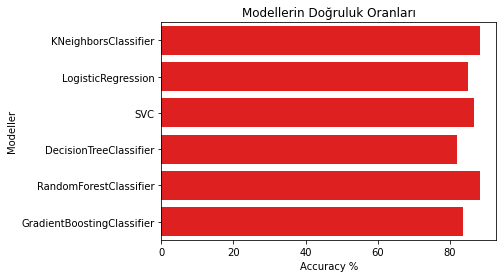

In [114]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  